# Question One:
The Marketing Teamhas launched a campaign recently and they want to understand how well their
campaigns are able to attract new customers.
Show the New Customer Acquisition on a trend line. During which period did new customers grow
the most. During which period did it flatten?

### Import the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sweetviz as sw
import seaborn as sns
import datetime
sns.set()

### A glance at the dataset:

In [2]:
data=pd.read_csv('Dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Category           51290 non-null  object 
 1   City               51290 non-null  object 
 2   Country            51290 non-null  object 
 3   Customer ID        51290 non-null  object 
 4   Customer Name      51290 non-null  object 
 5   Market             51290 non-null  object 
 6   Order Date         51290 non-null  object 
 7   Order ID           51290 non-null  object 
 8   Order Priority     51290 non-null  object 
 9   Product ID         51290 non-null  object 
 10  Product Name       51290 non-null  object 
 11  Region             51290 non-null  object 
 12  Row ID             51290 non-null  int64  
 13  Segment            51290 non-null  object 
 14  Ship Date          51290 non-null  object 
 15  Ship Mode          51290 non-null  object 
 16  State              512

In [3]:
data.head()

,Category,City,Country,Customer ID,Customer Name,Market,Order Date,Order ID,Order Priority,Product ID,...,Ship Date,Ship Mode,State,Sub-Category,Discount,Number of Records,Profit,Quantity,Sales,Shipping Cost
0,Office Supplies,Budapest,Hungary,AT-7352,Annie Thurman,EMEA,01-01-2011,HU-2011-1220,High,OFF-TEN-10001585,...,05-01-2011,Second Class,Budapest,Storage,0.0,1,29.640,4,66,8.17
1,Office Supplies,Stockholm,Sweden,EM-141402,Eugene Moren,EU,01-01-2011,IT-2011-3647632,High,OFF-PA-10001492,...,05-01-2011,Second Class,Stockholm,Paper,0.5,1,-26.055,3,45,4.82
2,Office Supplies,Constantine,Algeria,TB-112801,Toby Braunhardt,Africa,01-01-2011,AG-2011-2040,Medium,OFF-TEN-10000025,...,06-01-2011,Standard Class,Constantine,Storage,0.0,1,106.140,2,408,35.46
3,Furniture,Wagga Wagga,Australia,JH-159851,Joseph Holt,APAC,01-01-2011,IN-2011-47883,Medium,FUR-FU-10003447,...,08-01-2011,Standard Class,New South Wales,Furnishings,0.1,1,37.770,5,114,4.70
4,Office Supplies,Wagga Wagga,Australia,JH-159851,Joseph Holt,APAC,01-01-2011,IN-2011-47883,Medium,OFF-PA-10001968,...,08-01-2011,Standard Class,New South Wales,Paper,0.1,1,15.342,2,55,1.80


### Procedure:

In [4]:
trend_data=pd.concat([data['Customer ID'],data['Order Date']],axis=1)
trend_data['Order Date']= pd.to_datetime(trend_data['Order Date'])

Each year is divided into four quarters (each quarter - three months). For a period of four years, we have 12 such quarters. Each instance is then classified to the respective quarter corresponding to the order date

In [5]:
def group_to_quarters(x):
    month=x.month
    year=x.year
    quarter={2011:0,2012:3,2013:6,2014:9}
    if month%4 == 0:
        return (month//4)+quarter[year]
    else:
        return ((month//4)+1)+quarter[year]

In [6]:
trend_data['Quarter']=trend_data['Order Date'].apply(group_to_quarters)

Since each customer ID is repeated, we remove the duplicates keeping only the first occurrence of an ID. This way, we can concentrate only on the new customers

In [7]:
trend_data.drop_duplicates(subset ="Customer ID",keep = 'first', inplace = True) 
trend_data.head()

,Customer ID,Order Date,Quarter
0,AT-7352,2011-01-01,1
1,EM-141402,2011-01-01,1
2,TB-112801,2011-01-01,1
3,JH-159851,2011-01-01,1
6,MM-72602,2011-02-01,1


In [8]:
customer_aq=pd.DataFrame(data=trend_data['Quarter'].value_counts()).sort_index(axis=0)
customer_aq['No. of new customers']=customer_aq['Quarter']
customer_aq['Quarter']=[i for i in range(1,13)]
customer_aq

,Quarter,No. of new customers
1,1,913
2,2,949
3,3,1028
4,4,357
5,5,438
6,6,377
7,7,186
8,8,196
9,9,184
10,10,67


### Plotting the trend line:

The trend line is plotted with the above data. From the trend line, we can see

1) The number of new customers reached the maximum during the third quarter

2) There was negligible change in the number of new customers during (7 - 9) and (10 - 12) quarters. The curve is flat

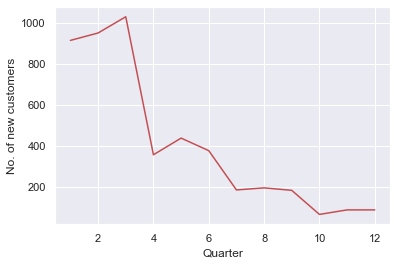

In [18]:
plt.plot(customer_aq['Quarter'],customer_aq['No. of new customers'],'r')
plt.xlabel('Quarter')
plt.ylabel('No. of new customers')
plt.savefig('trend_line.png')
plt.show()